# **Modelo de Predicción**

Vamos a probar varios de los modelos de ensamble a ver cual funciona mejor para nuestro problema de regresión:

In [21]:
import pandas as pd
import pickle
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("../")
from src import funciones_problemas_regresion as fpr

In [22]:
df =  pd.read_csv("../datos/df_madrid_nonulls_encoded_sinout_estand.csv", index_col=0).reset_index(drop=True)
variable_respuesta = "price"

df.head()

,price,size_standar,municipality_standar,distance_standar,floor_standar,hasLift_standar,rooms_0_standar,rooms_1_standar,rooms_2_standar,rooms_3_standar,...,bathrooms_1_standar,bathrooms_2_standar,bathrooms_3_standar,propertyType_chalet_standar,propertyType_countryHouse_standar,propertyType_duplex_standar,propertyType_flat_standar,propertyType_penthouse_standar,propertyType_studio_standar,exterior_True_standar
0,750.0,0.178464,0.738475,-0.682481,0.472951,0.951320,-0.411054,1.350926,-0.764272,-0.391230,...,0.305857,-0.305857,0.0,-0.054393,-0.054393,-0.199693,0.523866,-0.174342,-0.406138,0.473103
1,750.0,0.741247,0.276478,0.001239,-0.972445,-0.789256,-0.411054,-0.740233,1.308434,-0.391230,...,0.305857,-0.305857,0.0,-0.054393,-0.054393,-0.199693,0.523866,-0.174342,-0.406138,0.473103
2,400.0,0.572412,-4.815161,2.921085,0.355032,-0.789256,-0.411054,-0.740233,1.308434,-0.391230,...,-3.269504,3.269504,0.0,-0.054393,-0.054393,-0.199693,-1.908883,5.735852,-0.406138,0.473103
3,590.0,0.741247,-2.114161,3.037816,-1.600627,-0.789256,-0.411054,-0.740233,-0.764272,2.556039,...,-3.269504,3.269504,0.0,-0.054393,-0.054393,-0.199693,0.523866,-0.174342,-0.406138,0.473103
4,684.0,-0.665712,0.738475,-0.410810,-1.600627,-2.446523,2.432769,-0.740233,-0.764272,-0.391230,...,0.305857,-0.305857,0.0,-0.054393,-0.054393,-0.199693,-1.908883,-0.174342,2.462214,0.473103


Probaremos varios modelos de ensamble y compararemos sus métricas a ver cual es el que arroja mejores resultados.

## Random Forest Regressor

In [36]:
variable_respuesta = "price"
modelo = "RandomForestRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'n_estimators': [50, 100, 150], #número de árboles que queremos en el bosque
    'max_depth': [15, 20, 30],
    'min_samples_split': [15, 20, 25],
    'min_samples_leaf': [15, 20, 25], 
    'max_leaf_nodes': [100, 200, 300]
}

df_metricas, modelo_random_forest_1 = clase_arbol.grid_search(params_rf, cv=3)
df_metricas

Calculando el modelo con RandomForestRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 15, 'max_leaf_nodes': 100, 'min_samples_leaf': 15, 'min_samples_split': 15, 'n_estimators': 150}


,r2_scores,MAE,MSE,RMSE
train,0.482901,32.062085,1856.527423,43.087439
test,0.330055,37.084271,2859.611646,53.475337


In [ ]:
variable_respuesta = "price"
modelo = "RandomForestRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'n_estimators': [150, 200, 250, 300], #número de árboles que queremos en el bosque
    'max_depth': [5, 7, 10, 15],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [10, 15], 
    'max_leaf_nodes': [60,70,80]
}

df_metricas, modelo_random_forest_2 = clase_arbol.grid_search(params_rf, cv=3)
df_metricas

Calculando el modelo con RandomForestRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 10, 'max_leaf_nodes': 60, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 300}


,r2_scores,MAE,MSE,RMSE
train,0.536404,30.254486,1664.437377,40.797517
test,0.337649,37.788246,2827.198902,53.171411


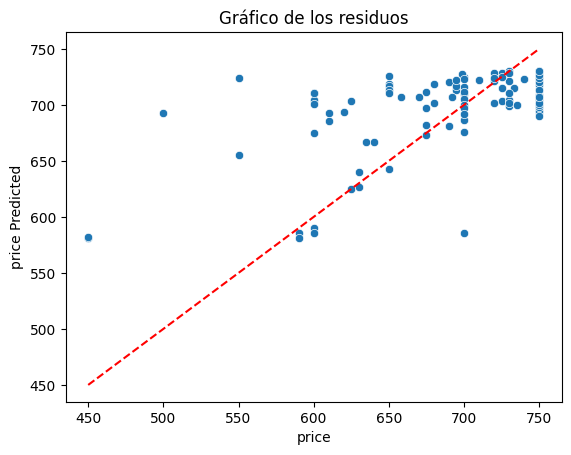

In [38]:
clase_arbol.visualizacion_residuos()

In [49]:
pd.DataFrame((df.describe().T).iloc[0,:]).T

,count,mean,std,min,25%,50%,75%,max
price,339.0,692.377581,61.804274,400.0,650.0,700.0,740.0,750.0


In [50]:
error = round(100*53/700, 2)
print(f"Nos estamos confundiendo de media en un {error}% al estimar el precio del alquiler de la vivienda, tomando de referencia la mediana.")

Nos estamos confundiendo de media en un 7.57% al estimar el precio del alquiler de la vivienda, tomando de referencia la mediana.


Tras varios intentos con los distintos modelos hemos observado que el que menos problemas de overfitting tiene es el random forest. 

In [51]:
with open('../datos/modelos/modelo_random_forest.pkl', 'wb') as f:
    pickle.dump(modelo_random_forest_2, f)

## Gradient Boosting Regressor

In [43]:
modelo = "GradientBoostingRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'n_estimators': [50, 100, 150], #número de árboles que queremos en el bosque
    'max_depth': [15, 20, 30],
    'min_samples_split': [15, 20, 25],
    'min_samples_leaf': [15, 20, 25], 
    'max_leaf_nodes': [100, 200, 300]
}

df_metricas, modelo_grad_boosting_1 = clase_arbol.grid_search(params_rf, cv=3)
df_metricas

Calculando el modelo con GradientBoostingRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 15, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 15, 'n_estimators': 50}


,r2_scores,MAE,MSE,RMSE
train,0.655021,25.398104,1238.569799,35.193320
test,0.349265,38.794990,2777.615579,52.703089


# XGBRegressor

Probaremos este modelo de predicción simplemente por comprobar qué métricas nos da, aunque las obtenidas anteriormente ya sean suficientemente buenas.

In [11]:
modelo = "XGBRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_xgb = {
    'n_estimators': [60, 65, 70],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight':  [3, 4, 5, 6],  # Equivalente a min_samples_leaf
    'subsample': [0.8, 1.0],        # Para evitar sobreajuste
    'colsample_bytree': [0.8, 1.0]  # Selección de columnas al construir cada árbol
}

df_metricas, modelo_xgb = clase_arbol.grid_search(params_xgb, cv=5)
df_metricas

Calculando el modelo con XGBRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 60, 'subsample': 0.8}


,r2_scores,MAE,MSE,RMSE
train,0.992920,0.919284,25.418056,5.041632
test,0.994341,1.449843,24.154566,4.914729


In [12]:
modelo = "XGBRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_xgb = {
    'n_estimators': [50, 55, 60],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight':  [3, 4, 5, 6],  # Equivalente a min_samples_leaf
    'subsample': [0.8, 0.9, 1.0],        # Para evitar sobreajuste
    'colsample_bytree': [0.8, 1.0]  # Selección de columnas al construir cada árbol
}

df_metricas, modelo_xgb = clase_arbol.grid_search(params_xgb, cv=5)
df_metricas

Calculando el modelo con XGBRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 55, 'subsample': 0.8}


,r2_scores,MAE,MSE,RMSE
train,0.992869,0.999958,25.602434,5.059885
test,0.994604,1.522214,23.030645,4.799025


Son métricas bastante buenas, sin embargo, las obtenidas anteriormente son mejores, por lo tanto nos quedamos con el modelo anterior.

_______________________________

# Modelo final

Ahora vamos a entrenar a nuestro modelo con todos los datos:

In [52]:
with open('../datos/modelos/modelo_random_forest.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)

X  = df.drop(columns=variable_respuesta)
y = df[[variable_respuesta]]
modelo_cargado.fit(X, y)

RandomForestRegressor(max_depth=10, max_leaf_nodes=70, min_samples_leaf=10,
                      min_samples_split=10, n_estimators=40, random_state=42)

In [53]:
y_train_pred = modelo_cargado.predict(X)
r2 = round(r2_score(y,  y_train_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y,  y_train_pred)), 2)
print(f"Tenemos un r2 score de {r2} y un RMSE de {rmse}.")

Tenemos un r2 score de 0.55 y un RMSE de 41.25.


In [54]:
with open('../datos/modelos/modelo_prediccion_final.pkl', 'wb') as f:
    pickle.dump(modelo_cargado, f)